# EDA of RVL_CDIP Dataset

In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
from collections import Counter
from tqdm import tqdm
import random
import csv
import shutil
import cv2

#### Data Loading

In [ ]:
DataPath = r"/home/woody/iwi5/iwi5280h/dataset/data/images"
LabelPath = r"/home/woody/iwi5/iwi5280h/dataset/data/labels/train.txt"
csvFile = r"/home/woody/iwi5/iwi5280h/dataset/data/train.csv"
with open(LabelPath, 'r') as infile, open(csvFile, 'w') as outfile:
        stripped = (line.strip() for line in infile)
        lines = (line.split(",") for line in stripped if line)
        writer = csv.writer(outfile)
        writer.writerows(lines)

#Loading data
df=pd.read_csv("/home/woody/iwi5/iwi5280h/dataset/data/train.csv",header=None)
df.head()

,0
0,imagesq/q/o/c/qoc54c00/80035521.tif 15
1,imagese/e/w/c/ewc23d00/513280028.tif 1
2,imagesw/w/b/t/wbt26e00/2053453161.tif 7
3,imagesm/m/k/m/mkm05e00/2040792992_2040792994.t...
4,imageso/o/e/x/oex80d00/522787731+-7732.tif 3


In [3]:
#naming columns in data
df.columns=['image']

#ensuring the column is string type
df['image'] = df['image'].astype(str)

#splitting into two columns using space as a delimiter
df[['image', 'class']] = df['image'].str.split(' ', n=1, expand=True)

df.head()

,image,class
0,imagesq/q/o/c/qoc54c00/80035521.tif,15
1,imagese/e/w/c/ewc23d00/513280028.tif,1
2,imagesw/w/b/t/wbt26e00/2053453161.tif,7
3,imagesm/m/k/m/mkm05e00/2040792992_2040792994.tif,10
4,imageso/o/e/x/oex80d00/522787731+-7732.tif,3


In [4]:
#saving that to csv file
df.to_csv('data/train.csv')

#changing datatypes fpr easy use
df['image']=df['image'].astype(str)
df['class']=df['class'].astype(int)

In [5]:
# Class name mapping
class_name = {
    '0': 'letter', '1': 'form', '2': 'email', '3': 'handwritten',
    '4': 'advertisement', '5': 'scientific report', '6': 'scientific publication',
    '7': 'specification', '8': 'file folder', '9': 'news article',
    '10': 'budget', '11': 'invoice', '12': 'presentation', '13': 'questionnaire',
    '14': 'resume', '15': 'memo'
}

# Mapping the class numbers to their corresponding names and adding a new column
df['class_name'] = df['class'].map(lambda x: class_name[str(x)])

print(df)

                                                   image  class  \
0                    imagesq/q/o/c/qoc54c00/80035521.tif     15   
1                   imagese/e/w/c/ewc23d00/513280028.tif      1   
2                  imagesw/w/b/t/wbt26e00/2053453161.tif      7   
3       imagesm/m/k/m/mkm05e00/2040792992_2040792994.tif     10   
4             imageso/o/e/x/oex80d00/522787731+-7732.tif      3   
...                                                  ...    ...   
319995             imagesu/u/p/p/upp04f00/0000282789.tif      9   
319996             imagesa/a/c/z/acz60f00/0011972032.tif     15   
319997               imagesu/u/j/m/ujm20a00/10155388.tif      6   
319998             imagesd/d/r/r/drr93f00/0000343578.tif      9   
319999        imagesp/p/j/x/pjx11d00/518223252+-3253.tif      3   

                    class_name  
0                         memo  
1                         form  
2                specification  
3                       budget  
4                  handwritten

#### Data Statistics

In [6]:
print("Data Shape:", df.shape)
df.describe()

Data Shape: (320000, 3)


,class
count,320000.000000
mean,7.500797
std,4.611357
min,0.000000
25%,3.000000
50%,8.000000
75%,12.000000
max,15.000000


In [7]:
print(df.isnull().sum())

image         0
class         0
class_name    0
dtype: int64


#### Class Distribution

Total Number of Classes: 16


/tmp/ipykernel_1376665/1331581363.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=class_counts.index, y=class_counts.values, palette="viridis")


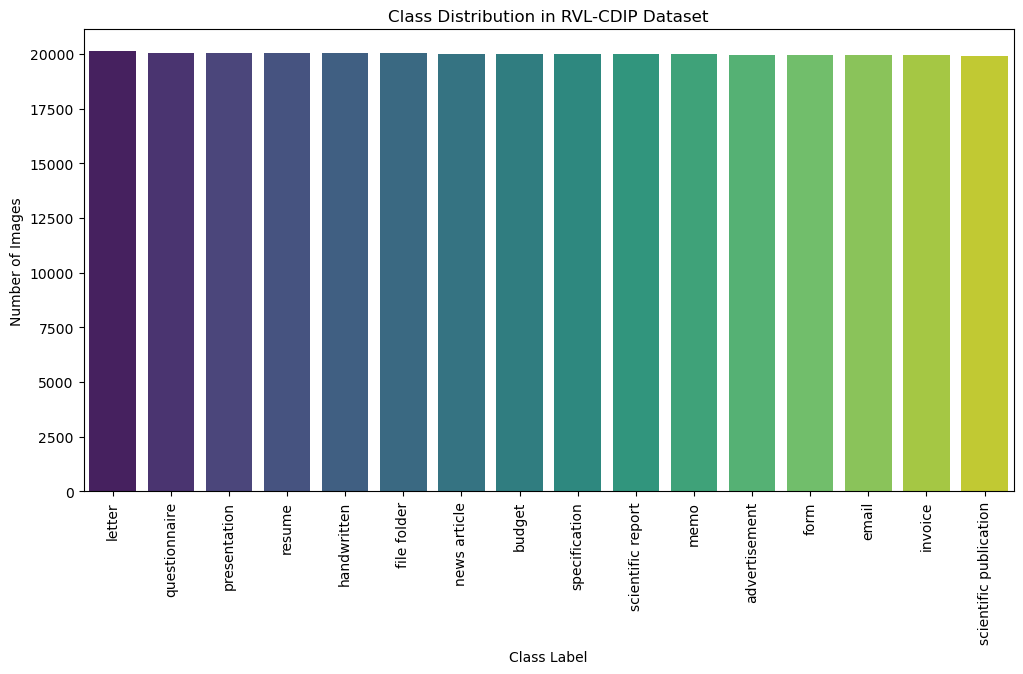

In [8]:
# Counting the number of classes 
num_classes = df["class_name"].nunique() 
print(f"Total Number of Classes: {num_classes}")

# Countting each class occurrences 
class_counts = df["class_name"].value_counts() 

# Plotting class distribution
plt.figure(figsize=(12, 6))
sns.barplot(x=class_counts.index, y=class_counts.values, palette="viridis")
plt.xticks(rotation=90)
plt.xlabel("Class Label")
plt.ylabel("Number of Images")
plt.title("Class Distribution in RVL-CDIP Dataset")
plt.show()

#### Example Images

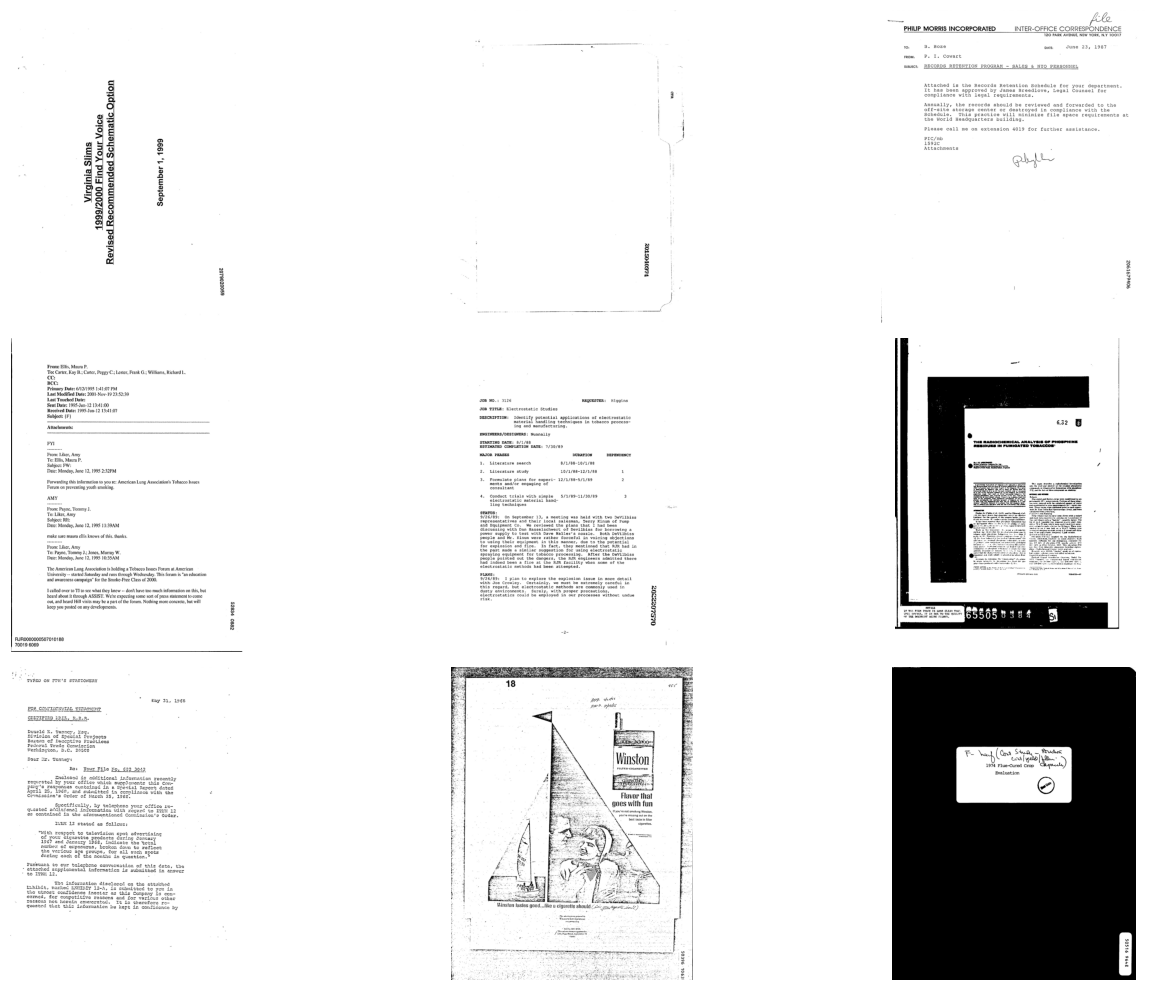

In [9]:
def show_random_img(df, num_img=9):
    plt.figure(figsize=(15, 10))
    for i in range(1, num_img + 1):
        random_int = random.randint(1, len(df)-1)
        img_path = df["image"][random_int]
        img_path = os.path.join(DataPath, img_path)
        #print(img_path)
        img = Image.open(img_path)
        
        plt.subplot(num_img // 3, 3, i)
        plt.imshow(img, cmap="gray")
        plt.axis("off")
    plt.tight_layout() 
    plt.show()
show_random_img(df)  
    

#### Width , Height and Aspect Ratio

In [10]:
# Extracting image sizes
images_list = df["image"][:320]
height = []
width = []
for image in images_list[0:320]:
    #print(image)
    img_path = os.path.join(DataPath, image)
    #print(img_path)
    img = Image.open(img_path)
    w, h = img.size
    
    width.append(w)
    height.append(h)

size_df = pd.DataFrame({"Width": width, "Height": height})

size_df.head()

,Width,Height
0,754,1000
1,771,1000
2,795,1000
3,806,1000
4,754,1000


In [11]:
size_df.describe()

,Width,Height
count,320.000000,320.0
mean,763.693750,1000.0
std,18.727713,0.0
min,637.000000,1000.0
25%,754.000000,1000.0
50%,754.000000,1000.0
75%,777.000000,1000.0
max,872.000000,1000.0


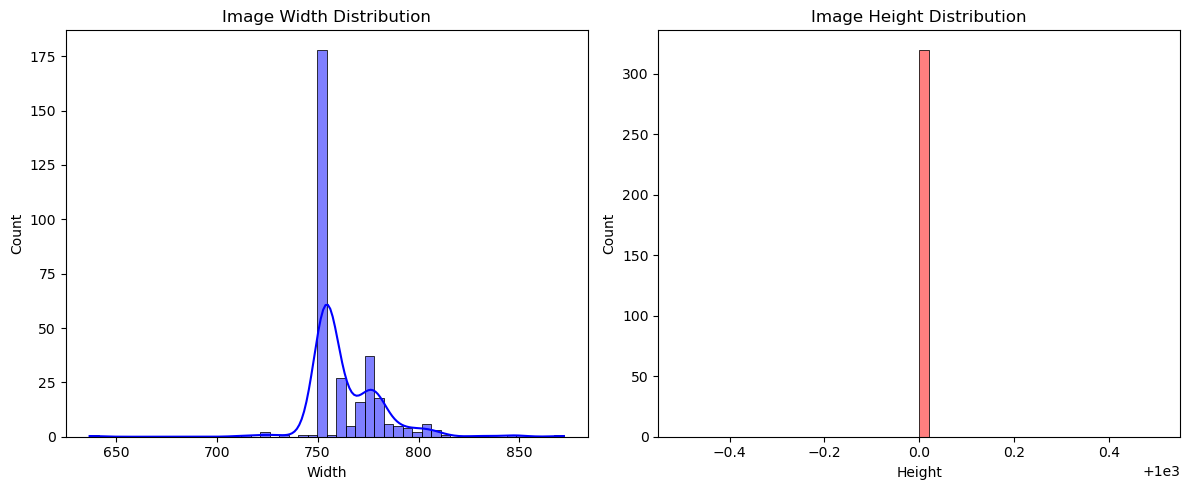

In [12]:
# Plotting resolution distribution
plt.figure(figsize=(12, 5)) 
plt.subplot(1, 2, 1) 
sns.histplot(size_df["Width"], bins=50, kde=True, color="blue") 
plt.xlabel("Width") 
plt.title("Image Width Distribution")

plt.subplot(1, 2, 2) 
sns.histplot(size_df["Height"], bins=50, kde=True, color="red") 
plt.xlabel("Height") 
plt.title("Image Height Distribution") 
plt.tight_layout() 
plt.show()

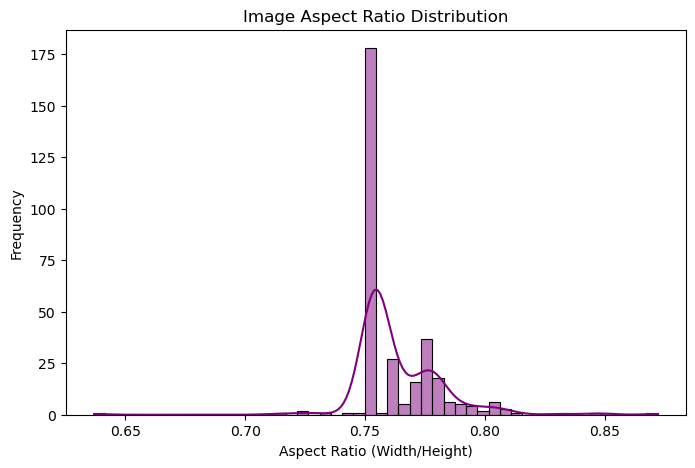

In [13]:
size_df["aspect_ratio"] = size_df["Width"] / size_df["Height"]

plt.figure(figsize=(8, 5))
sns.histplot(size_df["aspect_ratio"], bins=50, kde=True, color="purple")
plt.xlabel("Aspect Ratio (Width/Height)")
plt.ylabel("Frequency")
plt.title("Image Aspect Ratio Distribution")
plt.show()

#### Edge Detection

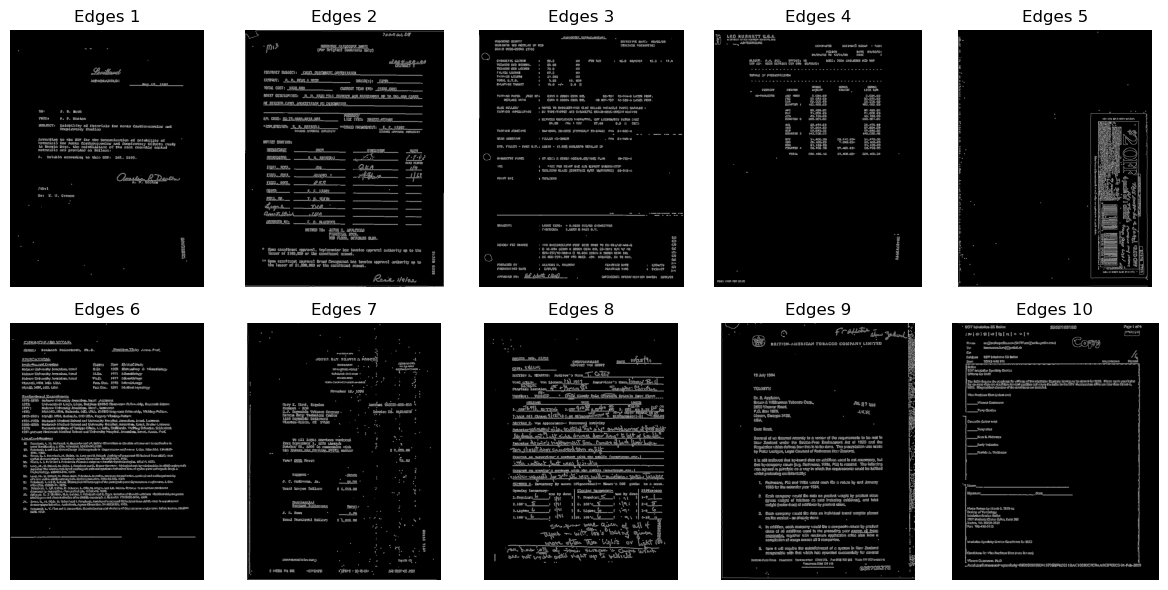

In [16]:
def compute_edges(img_path):
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    edges = cv2.Canny(img, 100, 200)
    return edges

plt.figure(figsize=(12, 6))
for i, img_path in enumerate(images_list[:10]):
    img_path = os.path.join(DataPath, img_path)
    edges = compute_edges(img_path)

    plt.subplot(2, 5, i + 1)
    plt.imshow(edges, cmap="gray")
    plt.axis("off")
    plt.title(f"Edges {i+1}")

plt.tight_layout()
plt.show()

#### Texture Feature Extraction

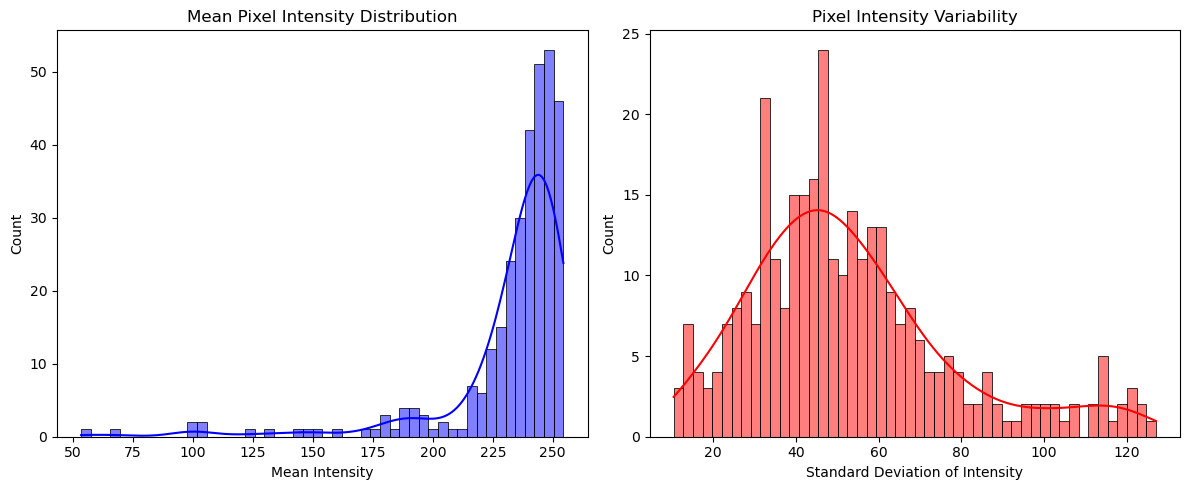

In [15]:
sampled_df = df.sample(320, random_state=42)
def extract_texture_features(img_path):
    img_path = os.path.join(DataPath, img_path)
    img = Image.open(img_path).convert("L") # Gray Scale Converstion
    img_np = np.array(img)
    return np.mean(img_np), np.std(img_np)

sampled_df["mean_intensity"], sampled_df["std_intensity"] = zip(*sampled_df["image"].apply(extract_texture_features))

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(sampled_df["mean_intensity"], bins=50, kde=True, color="blue")
plt.xlabel("Mean Intensity")
plt.title("Mean Pixel Intensity Distribution")

plt.subplot(1, 2, 2)
sns.histplot(sampled_df["std_intensity"], bins=50, kde=True, color="red")
plt.xlabel("Standard Deviation of Intensity")
plt.title("Pixel Intensity Variability")

plt.tight_layout()
plt.show()